## پروژه پایانی درس هوش مصنوعی
غزل نیسی مینایی - ۸۱۰۱۹۶۶۸۳

<div style="direction:rtl">
هدف از انجام این پروژه تخمین قیمت گوشی تلفن همراه است. از آنجا که قیمت کمیتی پیوسته است این مسیله از جنس مسایل رگرسیون است.
</div>

<div style="direction:rtl">
از مجموعه از آگاهی های سایت دیوار برای انجام این پروژه استفاده می کنیم.
</div>

<div style="direction:rtl">
این داده ها شامل ستون های برند- شهر- عنوان - توضیح - تعداد عکس -تاریخ ایجاد و قیمت است که ستون قیمت ستون هدف است.
</div>

<div style="direction:rtl">
برای بررسی و کار با نوشته های فارسی از کتابخانه hazm استفاده میکنیم. این کتابخانه مجموعه ای ابزار برای بررسی و ویرایش و استخراج ویژگی از متون فارسی در اختیار ما قرار می دهد.
</div>

In [1]:
from __future__ import unicode_literals
from hazm import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string, re
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

<div style="direction:rtl">
کلمات زیر کلماتی هستند که وجود آنها در متن میتواند تاثیرگذار باشد همچنین با املاها و روش های گوناگون نوشته میشوند. در ادامه از این مجموعه برای بررسی متون استفاده میکنیم.
</div>

In [2]:
PROCESSED_DESC = "processedDesc"
PERSIAN_DICT = {
    "گیگ" : "gb",
    "گیگه" : "gb",
    "گیگابایت" : "gb",
    "گیگابایته" : "gb",
    "آیفون" : "iphone",
    "ایفون" : "iphone",
    "گلکسی" : "galaxy",
    "gig" : "gb",
    "gigabyte" : "gb",
    "گری" : "gray",
    "گولد" : "gold",
    "گلد" : "gold",
    "گری" : "gray",
    "سیلور" : "silver",
    "اندروید" : "android",
    "آندروید" : "android",
    "ال جی" : "lg",
    "سامسونگ" : "sumsung"
}

<div style="direction:rtl">
بررسی داده ها:
</div>

<div style="direction:rtl">
در اینجا ویژگی های مختلف داده ها را مورد بررسی قرار میدهیم. تعداد لیبل ها در هر ستون و رنج ستون قیمت و خلاصه ای از داده ها را مشاهده میکنید
</div>

In [3]:
dataFrame = pd.read_csv("mobile_phone_dataset.csv")
dataFrame.head()

Unnamed: 0             brand     city                    title  \
0           0      Nokia::نوکیا      Qom                نوکیا6303   
1           1        Apple::اپل   Tehran           ایفون ٥اس٣٢گیگ   
2           2  Samsung::سامسونگ  Mashhad               سامسونگ j5   
3           3        Apple::اپل    Karaj      گرى 5s ایفون  32گیگ   
4           4  Samsung::سامسونگ   Tehran  galaxy S5 Gold در حد آک   

                                                desc  image_count  \
0  سلام.یه گوشیه6303سالم که فقط دوتا خط کوچیک رو ...            2   
1          درحد نو سالم اصلى بدون ضربه مهلت تست میدم            0   
2  گوشى بسیار بسیار تمیز و فقط سه هفته کارکرده و ...            2   
3  گلس پشت و رو .کارت اپل ای دی. لوازم جانبی اصلی...            3   
4  کاملا تمیز و بدون حتی 1 خط و خش\nبه همراه گلاس...            2   

       created_at    price  
0  Wednesday 07AM    60000  
1  Wednesday 11AM  1150000  
2  Wednesday 02PM   590000  
3  Wednesday 04PM  1100000  
4     Friday 01PM   900000

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59189 entries, 0 to 59188
Data columns (total 8 columns):
Unnamed: 0     59189 non-null int64
brand          59189 non-null object
city           59189 non-null object
title          59189 non-null object
desc           59189 non-null object
image_count    59189 non-null int64
created_at     59189 non-null object
price          59189 non-null int64
dtypes: int64(3), object(5)
memory usage: 3.6+ MB


In [5]:
pd.Series(dataFrame.brand.unique())

0        Nokia::نوکیا
1          Apple::اپل
2    Samsung::سامسونگ
3       Huawei::هوآوی
4           LG::ال‌جی
5        ZTE::زدتی‌ای
6          Sony::سونی
7       HTC::اچ‌تی‌سی
8        Lenovo::لنوو
dtype: object

In [6]:
dataFrame['brand'] = dataFrame['brand'].apply(lambda x: x.split('::')[0])

In [7]:
pd.Series(dataFrame.city.unique())

0           Qom
1        Tehran
2       Mashhad
3         Karaj
4        Shiraz
5         Ahvaz
6       Isfahan
7        Tabriz
8    Kermanshah
dtype: object

In [8]:
pd.Series(dataFrame.created_at.unique())

0      Wednesday 07AM
1      Wednesday 11AM
2      Wednesday 02PM
3      Wednesday 04PM
4         Friday 01PM
            ...      
163      Tuesday 02AM
164     Thursday 02AM
165       Sunday 04AM
166       Monday 03AM
167     Saturday 02AM
Length: 168, dtype: object

<div style="direction:rtl">
تعدادی از قیمت ها منفی ۱ است که این داده ها را جدا کرده و در پایان قیمت آنها را گزارش میدهیم.
</div>

In [9]:
len(dataFrame[(dataFrame["price"] == -1)])

5888

In [10]:
dfTest = dataFrame[(dataFrame["price"] == -1)]
dfModel = dataFrame.drop(dfTest.index)

In [11]:
len(dataFrame), len(dfTest), len(dfModel)

(59189, 5888, 53301)

<div style="direction:rtl">
همانطور که دیده می شود تعدادی عدد بسیار کم داریم که مناسب قیمت گوشی نیستند. در ادامه نمودار قیمت ها و نمودار boxplot برحسب برند کشیده است. همانطور که از نمودارهت برمی آید اعداد خیلی کم در داده ها زیاد هستند. ممکن است ناشی از جا انداختن صفر توسط کاربر بوده باشد. چون تعدادشان کم نیست نمیتوانیم همه را حذف کنیم. پس با اتکا بر فرض قبلی آنهایی که کمتری از ۱۰۰۰ باشد حذف میکنیم و کمتر از ۱۰۰۰۰ را در ۱۰ ضرب میکنیم. راه های دیگری مثلا قیمت گذاری مبتنی بر برند نیز وجود دارد. که در بخش پایانی بحث میکنیم.
</div>

In [12]:
dfModel.price.describe()

count    5.330100e+04
mean     6.887984e+05
std      5.505624e+05
min      1.000000e+00
25%      2.700000e+05
50%      5.200000e+05
75%      9.500000e+05
max      2.800000e+06
Name: price, dtype: float64

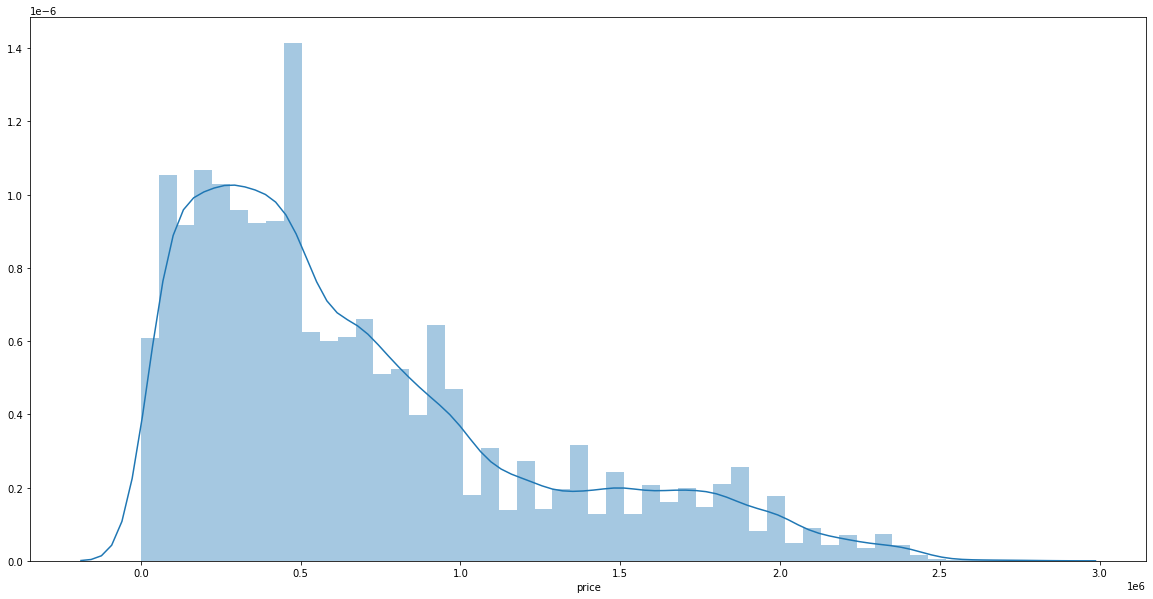

In [13]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.distplot(dfModel["price"])
plt.show()

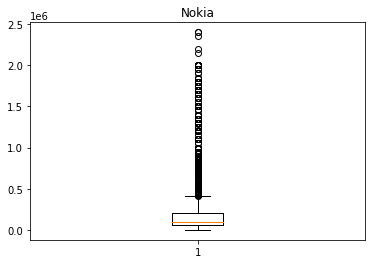

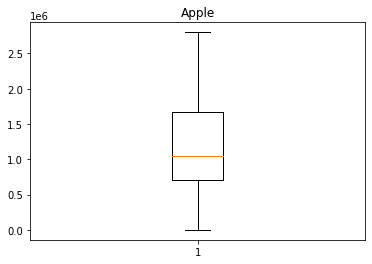

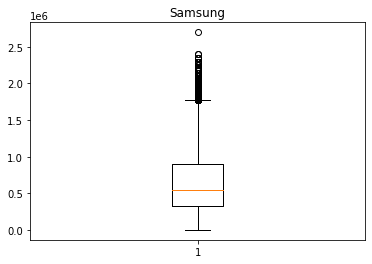

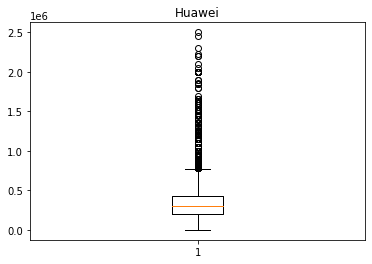

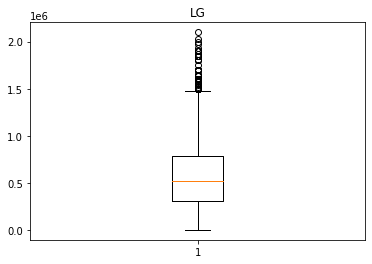

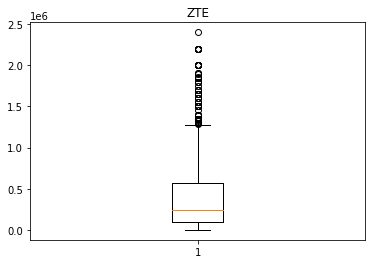

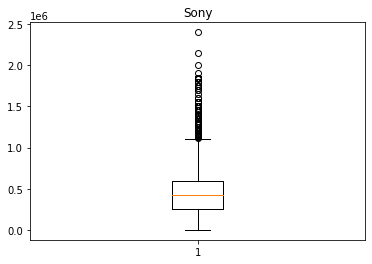

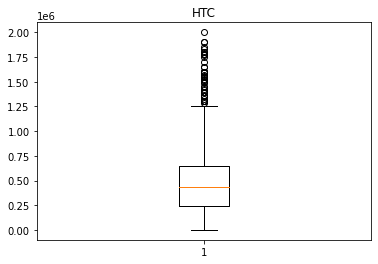

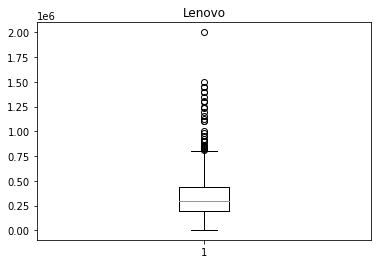

In [62]:
brandWise = []
brands = []
for m in pd.Series(dataFrame.brand.unique()):
    brandWise.append(dfModel[(dfModel["brand"] == m)])
    brands.append(m)
    

def boxPlotP(index):
    
    fig1, ax1 = plt.subplots()
    ax1.set_title(brands[index])
    ax1.boxplot(brandWise[index]["price"])

for b in range(len(brandWise)):
    boxPlotP(b)



<div style="direction:rtl">
    <br>
کلاس زیر بخش های مختلف برای پیش پردازش را پیاده سازی می کند. دو متد اول برای لیبل زدن به داده های کتگوریکال است که قبلا بررسی شده. در این پروژه فقط از روش one hot استفاده شده. تا لیبل های مختلف نسبت به بهم برتری نداشته باشند.
 </br>
 <br>
تابع extractDateFeatures فیچرهایی مانند روز هفته و آخر هفته بودن و ساعت را استخراج میکند.
    </br>
    <br>
تابع replacePersianWords کلمات بحث شده در قسمت قبل را جایگزین میکند.
    </br>
    <br>
تابع applyStemmer و applyLemmatizer وظیفه برگرداندن کلمات فارسی به ریشه را دارند. در قدم های بعدی از این توابع استفاده نشده. چون در اولین بررسی دیده شد که کلماتی مانند"آی دی" و کلمات مشابه را تک حرفی میکند و آسیب میزند. در بخش پایانی در بیشتر بررسی میشوند.
    </br>
    <br>
تابع cleanTexts برای نرمال کردن و حذف کردن کاراکترهای ناخواسته استفاده میشود.
</br>
<br>
دو تابع بعدی برای استخراج ویژگی tf idf استفاده میشوند. این شاخص فراوانی کلمات مهم در متن را نشان میدهد در ادامه از این ویژگی استفاده نشده. چون باعث پر شدن رم میشد این ویژگی می توانست واقعا تاثیرگذار باشد اما پیاده سازی آن زمان بر و پر از چالش بود.
    </br>
    <br>
دوتابع بعدی وظیفه استخراج کلمات پر کاربرد و بودن و نبودن آنها در هر متن را برعهده دارند. دو تابع addBagOfWords و makeBagOfWords توابع کمکی برای شمارش هستندو ای فیچرها جایگزین شاخص بالا شده است.
    </br>
    <br>
تابع refinePrice وظیفه بهبود بخشیدن به داده های نامناسب در قیمت ها به روشی که توضیح داده شد را دارد.
</br>
</div>

In [14]:
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing

NOT_IN_WORDS = "NOT_IN_WORDS"
def addBagOfWords(text, bagOfWords):
    for word in text:
        if word in bagOfWords.keys():
            bagOfWords[word] += 1
        else:
            bagOfWords[word] = 1
            
def makeBagOfWords(dfInp, columnName):
    bagOfWords = {}
    dfInp[columnName].apply(lambda x: addBagOfWords(x, bagOfWords))
    bagOfWords[NOT_IN_WORDS] = 1
    return bagOfWords

class PreProcessor():
    @staticmethod
    def labelEncodeColumn(dataFrame, cols):
        le = preprocessing.LabelEncoder()
        labeledDf = dataFrame.copy()
        for col in cols:
            labeledDf[col] = le.fit_transform(labeledDf[col])
        return labeledDf

    @staticmethod
    def oneHotEncodeColumn(dataFrame, cols):
        labeledDf = dataFrame.copy()
        for col in cols:
            newCols = pd.get_dummies(labeledDf[col], prefix=col)
            labeledDf = pd.concat([labeledDf, newCols], axis=1)
        return labeledDf

    @staticmethod
    def extractDateFeatures(dataFrame):
        df = dataFrame.copy()
        df["weekday"] = df["created_at"].apply(lambda x: x.split()[0])
        df["hour"] = df["created_at"].apply(lambda x: x.split()[1])
        df["isWeekend"] = df["weekday"].apply(lambda x: True if x in ["Friday", "Tuesday"] else False)
        return df
    
    @staticmethod
    def replacePersianWords(text):
        for w in PERSIAN_DICT:
            if w in text:
                text = text.replace(w, PERSIAN_DICT[w])
        return text
    

    @staticmethod
    def applyStemmer(text):
        stemmer = Stemmer()
        stemmedText = []
        for word in text:
            stemmedText.append(stemmer.stem(word))
        return stemmedText 

    @staticmethod
    def applyLemmatizer(text):
        lemmatizer = Lemmatizer()
        lemmatizedText = []
        for word in text:
            lemmatizedText.append(lemmatizer.lemmatize(word))
        return lemmatizedText 

    @staticmethod
    def cleanTexts(dataFrame, col, colTarget):
        normalizer = Normalizer(persian_numbers=False)
#         tokenizer = WordTokenizer()
#         splitter = TokenSplitter()
        df = dataFrame.copy()
        df[colTarget] = df[col].apply(lambda x: x.replace("\n", " "))
        df[colTarget] = df[colTarget].apply(lambda x: x.replace("\r", " "))
        df[colTarget] = df[colTarget].apply(lambda x: x.replace("…", " "))
        df[colTarget] = df[colTarget].apply(lambda x: re.sub(r'[^\w]', ' ', x))
        df[colTarget] = df[colTarget].apply(normalizer.normalize)
        df[colTarget] = df[colTarget].apply(lambda x: PreProcessor().replacePersianWords(x))
        return df
        
    @staticmethod
    def extractTrainFeaturesTfidf(dataFrame, col="desc"):
        df = PreProcessor().cleanTexts(dataFrame, col, PROCESSED_DESC+"Train")
        vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_features=500)
        tfidf = vectorizer.fit_transform(df[PROCESSED_DESC+"Train"].values)
        df1 = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
        print("df:", len(df))
        print("df1:", len(df1))
#         df1.reset_index(drop=True)
#         df.reset_index(drop=True)
        df.drop(PROCESSED_DESC+"Train", axis=1, inplace=True)
        return pd.concat([df, df1], axis=1)

    @staticmethod
    def extractTestFeaturesTfidf(dataFrame, col="desc"):
        df = PreProcessor().cleanTexts(dataFrame, col, PROCESSED_DESC+"Test")
        vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_features=250)
        tfidf = vectorizer.transform(df[PROCESSED_DESC+"Test"].values)
        df1 = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
        df.drop(PROCESSED_DESC+"Test", axis=1, inplace=True)
        return pd.concat([df, df1], axis=1)

    @staticmethod
    def extractWords(dataFrame, col="desc"):
        normalizer = Normalizer(persian_numbers=False)
        tokenizer = WordTokenizer()
#         splitter = TokenSplitter()
        df = dataFrame.copy()
        df[PROCESSED_DESC] = df[col].apply(lambda x: x.replace("\n", " "))
        df[PROCESSED_DESC] = df[PROCESSED_DESC].apply(lambda x: x.replace("\r", " "))
        df[PROCESSED_DESC] = df[PROCESSED_DESC].apply(lambda x: x.replace("…", " "))
        df[PROCESSED_DESC] = df[PROCESSED_DESC].apply(lambda x: re.sub(r'[^\w]', ' ', x))
        df[PROCESSED_DESC] = df[PROCESSED_DESC].apply(normalizer.normalize)
        df[PROCESSED_DESC] = df[PROCESSED_DESC].apply(lambda x: PreProcessor().replacePersianWords(x))
        df[PROCESSED_DESC] = df[PROCESSED_DESC].apply(tokenizer.tokenize)
        return df
    
    @staticmethod
    def getWordsAsFeatures(dataFrame, col="desc", n=150):
        d = dataFrame.copy()
        d = PreProcessor().extractWords(dataFrame, col)
        data = makeBagOfWords(d, PROCESSED_DESC)
        freq = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}
        index = 0
        for w in list(freq.keys())[0:n]:
            d["has" + str(index)] = d[PROCESSED_DESC].apply(lambda x: 1 if w in x else 0)
            index +=1
        return d

    @staticmethod
    def refinePrice(dataFrame):
        df = dataFrame.copy()
        toDrop = df[(df["price"] <= 1000)]
        df.drop(toDrop.index, inplace=True)
        toDrop = df[(df["price"] <= 10000)]
        df['newPrice'] = df.apply(lambda x: x['price']*10 if x['price'] < 10000 else x['price'], axis=1)
        
        return df

        

<div style="direction:rtl">
توابع زیر نمودار information gain را برای فیچرها رسم میکنند. نمودار دوم برای ۱۵۰ کلمه پرکاربرد است. 
</div>

In [16]:
def calculateInformationGain(dataFrame, dropList, labelList):
    labeledDf = dataFrame.drop(columns =dropList)
    labeledDf = PreProcessor().labelEncodeColumn(labeledDf, labelList)
    labels = labeledDf.columns.values.tolist()
    labeledDf.to_numpy()
    return dict(zip(labels, mutual_info_classif(labeledDf ,dataFrame['price'])))

def plotInformationGain(informationGains):
    plt.figure(figsize=(15, 5))
    plt.plot(list(informationGains.keys()), list(informationGains.values()))
    plt.xlabel("Features")
    plt.ylabel("Information Gain")
    plt.title("Information Gain value per Feature")
    plt.show()

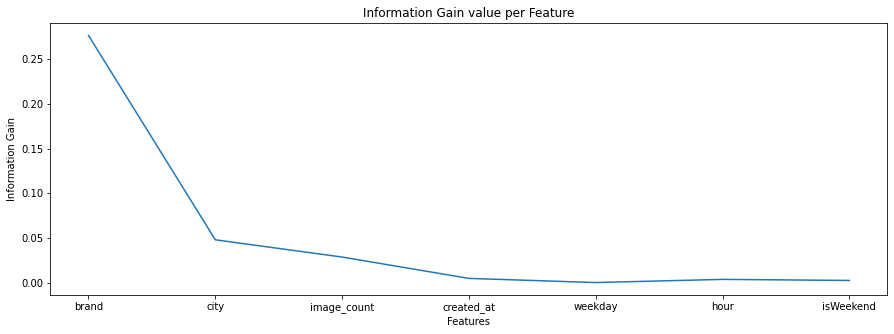

In [57]:
plotInformationGain(
    calculateInformationGain(
        PreProcessor().extractDateFeatures(dataFrame),
        ['price', 'Unnamed: 0', 'title', 'desc'],
        ['brand', 'city', 'created_at', 'weekday', 'isWeekend', 'hour']
    )
)

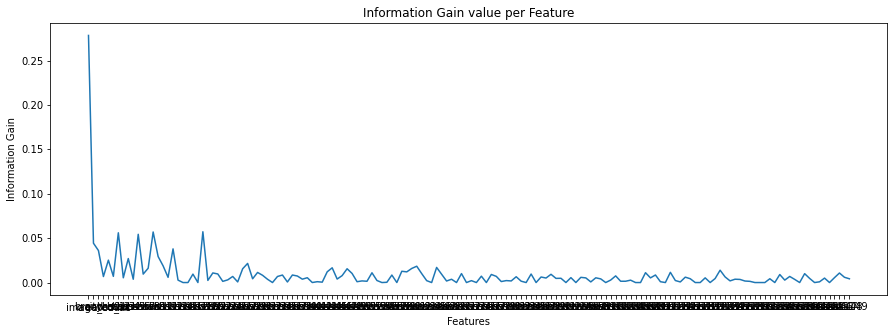

In [59]:
plotInformationGain(
    calculateInformationGain(
        PreProcessor().getWordsAsFeatures(dataFrame, 'title'),
        ['price', 'Unnamed: 0', 'title', 'desc', PROCESSED_DESC],
        ['brand', 'city', 'created_at']
    )
)

<div style="direction:rtl">
نمودار زیر نمودار قیمت بر اساس بودن و نبودن کلمات پرکاربرد است. همانطور که دیده می شود بعضی از آن ها اثرگذارند. یک راه برای بهبود نتایج میتواند استفاده از کلمات اثر گذار بجای استفاده از تمامی آنها باشد.
</div>

/home/ghazal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ghazal/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 1080x360 with 0 Axes>

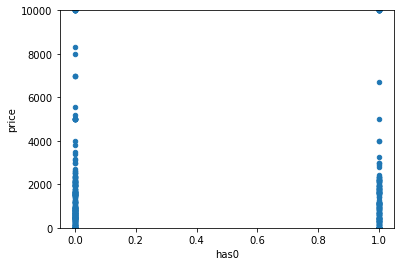

<Figure size 1080x360 with 0 Axes>

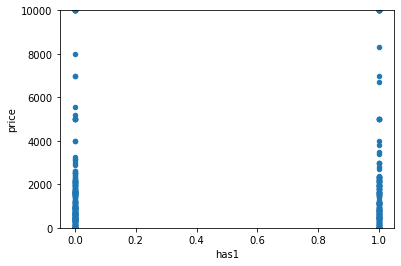

<Figure size 1080x360 with 0 Axes>

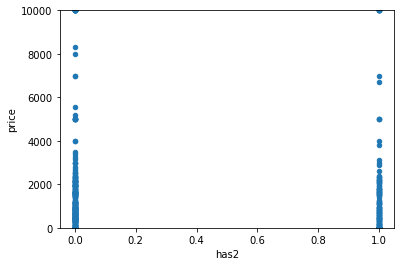

<Figure size 1080x360 with 0 Axes>

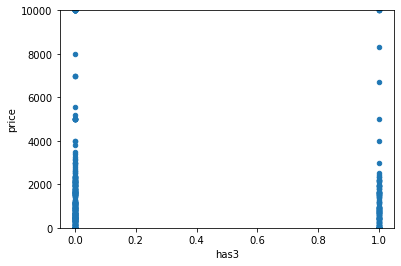

<Figure size 1080x360 with 0 Axes>

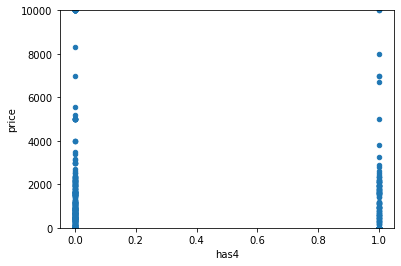

<Figure size 1080x360 with 0 Axes>

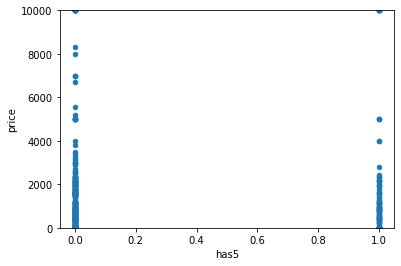

<Figure size 1080x360 with 0 Axes>

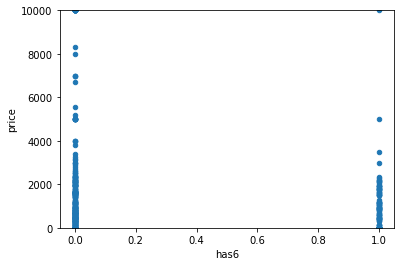

<Figure size 1080x360 with 0 Axes>

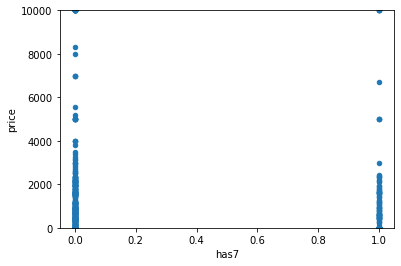

<Figure size 1080x360 with 0 Axes>

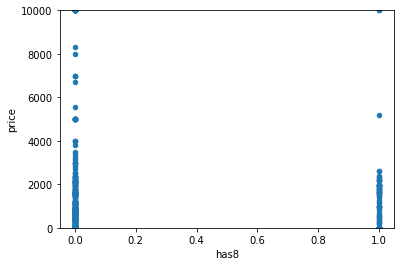

<Figure size 1080x360 with 0 Axes>

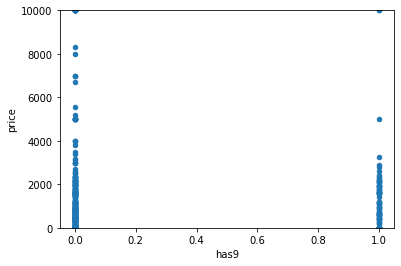

<Figure size 1080x360 with 0 Axes>

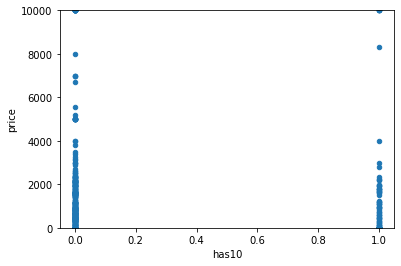

<Figure size 1080x360 with 0 Axes>

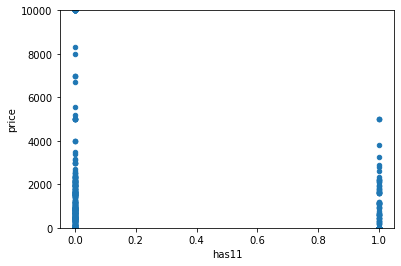

<Figure size 1080x360 with 0 Axes>

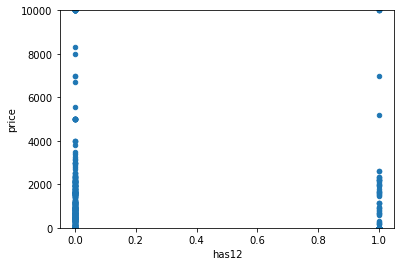

<Figure size 1080x360 with 0 Axes>

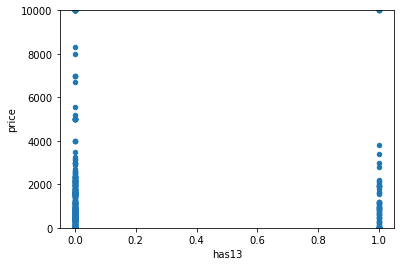

<Figure size 1080x360 with 0 Axes>

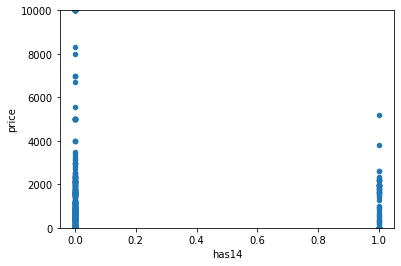

<Figure size 1080x360 with 0 Axes>

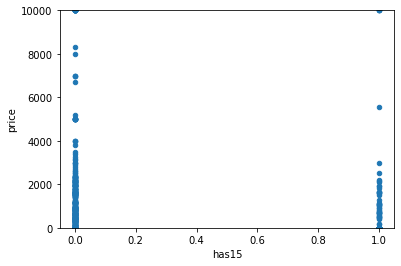

<Figure size 1080x360 with 0 Axes>

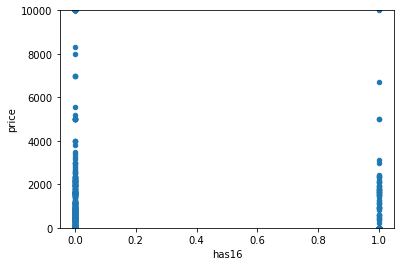

<Figure size 1080x360 with 0 Axes>

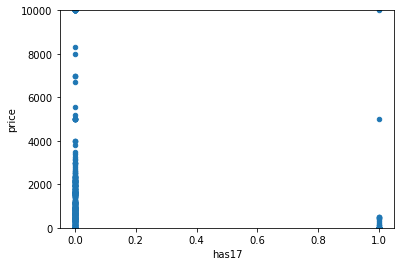

<Figure size 1080x360 with 0 Axes>

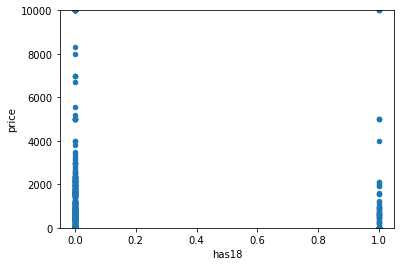

<Figure size 1080x360 with 0 Axes>

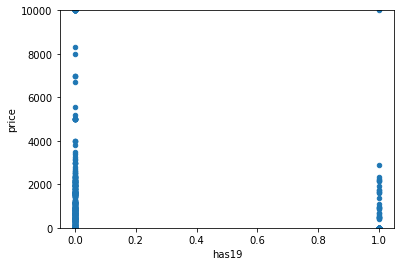

<Figure size 1080x360 with 0 Axes>

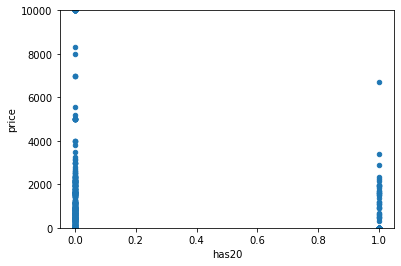

<Figure size 1080x360 with 0 Axes>

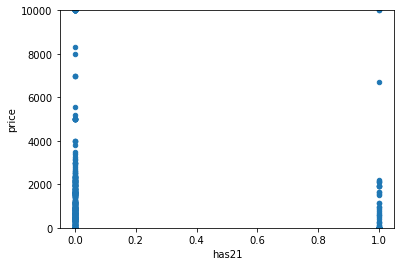

<Figure size 1080x360 with 0 Axes>

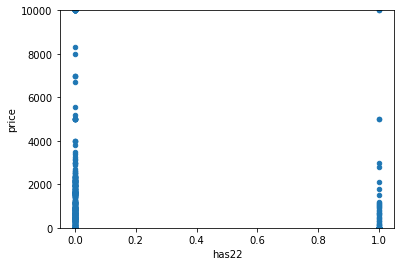

<Figure size 1080x360 with 0 Axes>

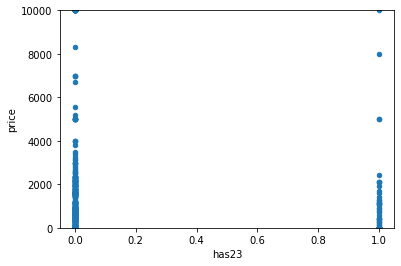

<Figure size 1080x360 with 0 Axes>

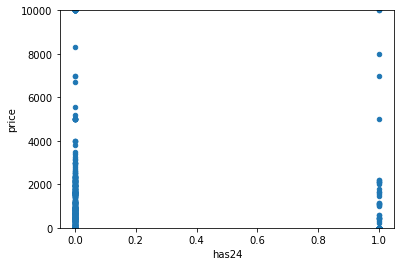

<Figure size 1080x360 with 0 Axes>

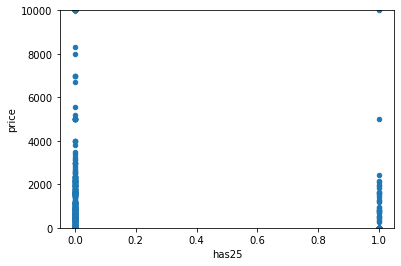

<Figure size 1080x360 with 0 Axes>

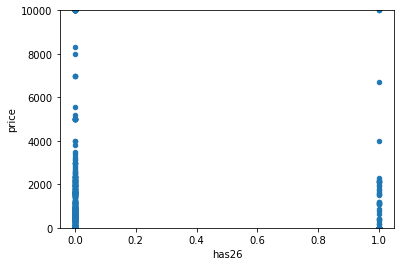

<Figure size 1080x360 with 0 Axes>

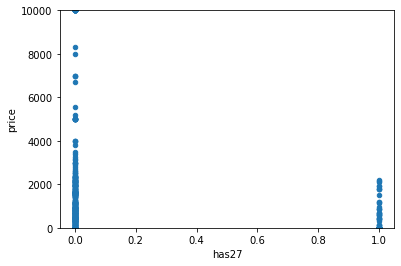

<Figure size 1080x360 with 0 Axes>

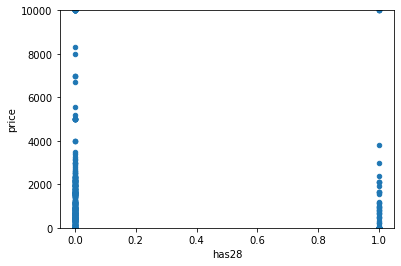

<Figure size 1080x360 with 0 Axes>

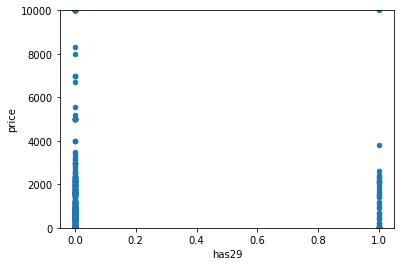

<Figure size 1080x360 with 0 Axes>

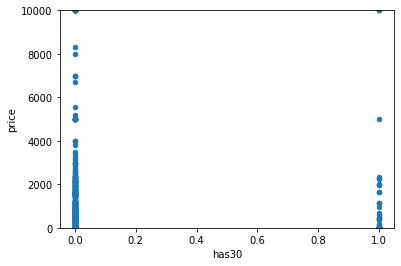

<Figure size 1080x360 with 0 Axes>

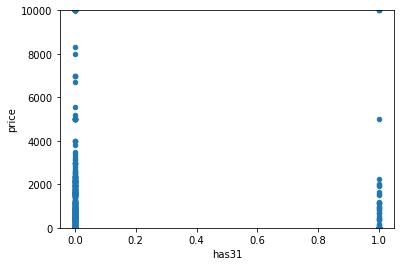

<Figure size 1080x360 with 0 Axes>

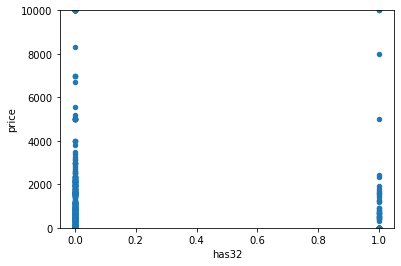

<Figure size 1080x360 with 0 Axes>

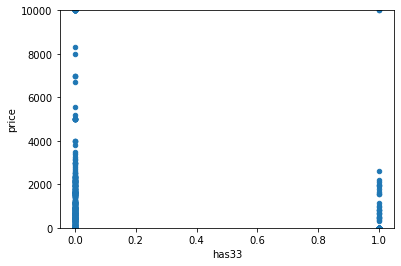

<Figure size 1080x360 with 0 Axes>

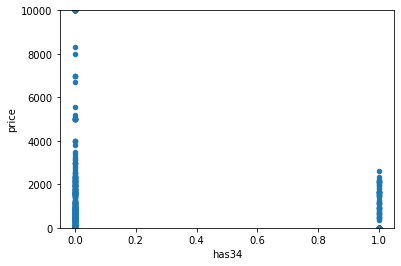

<Figure size 1080x360 with 0 Axes>

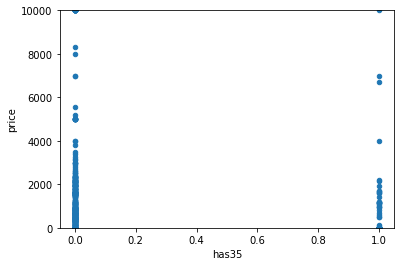

<Figure size 1080x360 with 0 Axes>

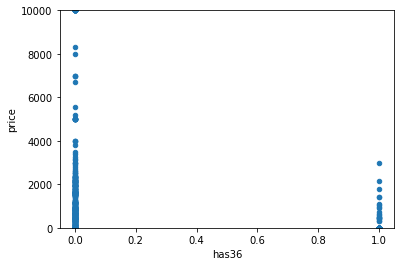

<Figure size 1080x360 with 0 Axes>

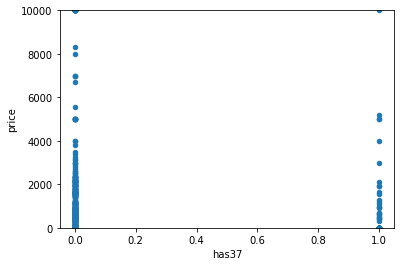

<Figure size 1080x360 with 0 Axes>

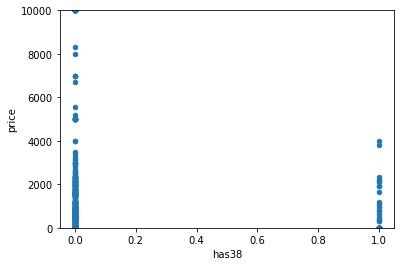

<Figure size 1080x360 with 0 Axes>

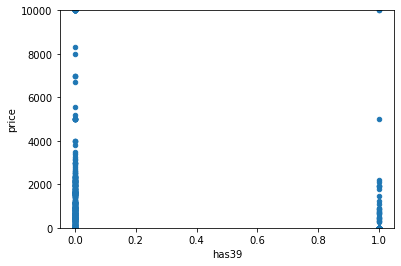

<Figure size 1080x360 with 0 Axes>

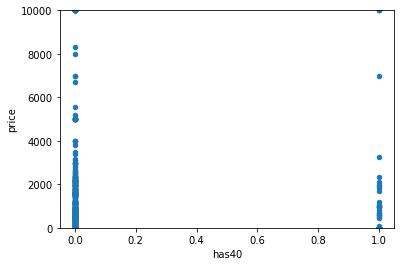

<Figure size 1080x360 with 0 Axes>

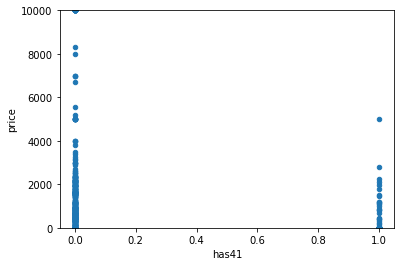

<Figure size 1080x360 with 0 Axes>

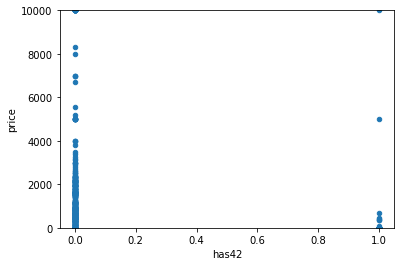

<Figure size 1080x360 with 0 Axes>

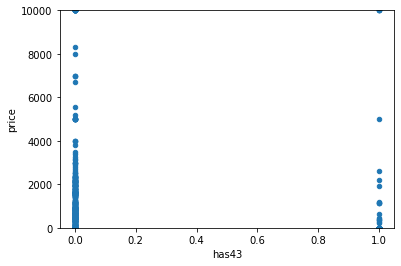

<Figure size 1080x360 with 0 Axes>

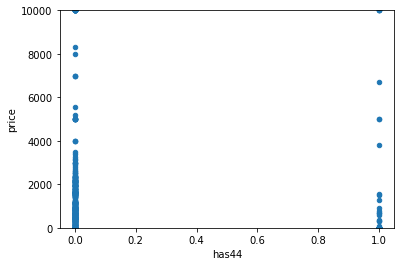

<Figure size 1080x360 with 0 Axes>

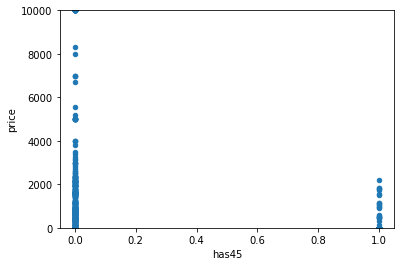

<Figure size 1080x360 with 0 Axes>

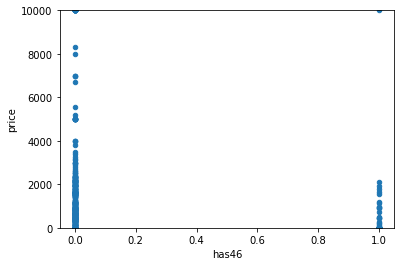

<Figure size 1080x360 with 0 Axes>

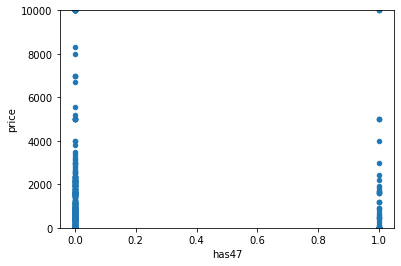

<Figure size 1080x360 with 0 Axes>

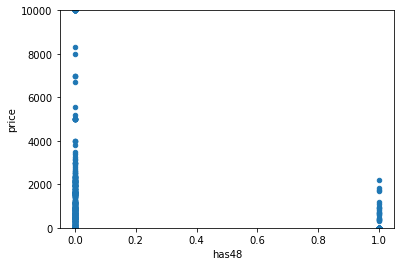

<Figure size 1080x360 with 0 Axes>

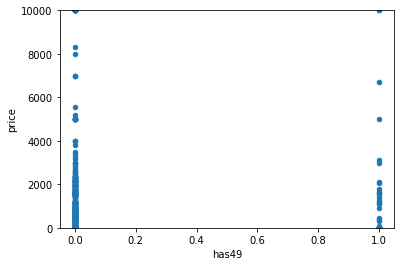

<Figure size 1080x360 with 0 Axes>

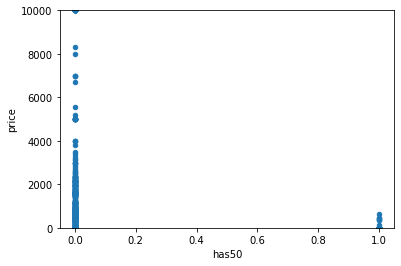

<Figure size 1080x360 with 0 Axes>

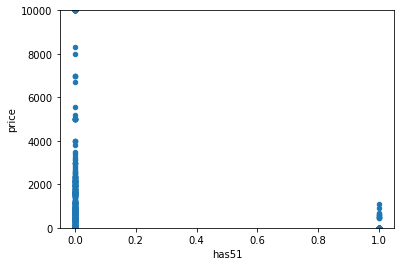

<Figure size 1080x360 with 0 Axes>

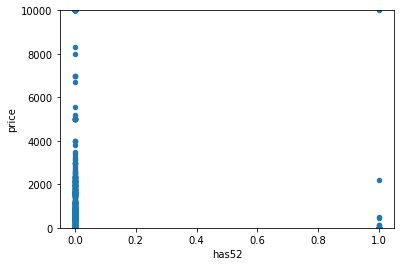

<Figure size 1080x360 with 0 Axes>

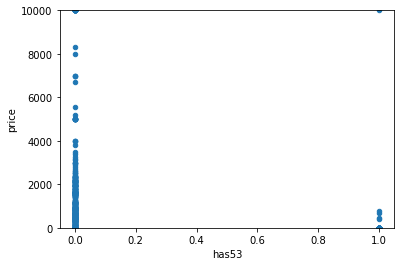

<Figure size 1080x360 with 0 Axes>

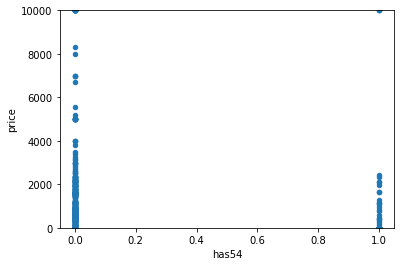

<Figure size 1080x360 with 0 Axes>

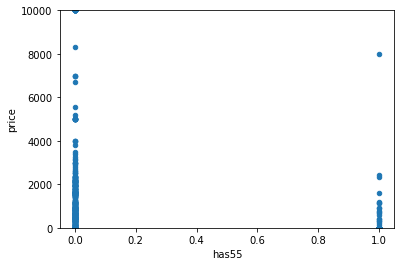

<Figure size 1080x360 with 0 Axes>

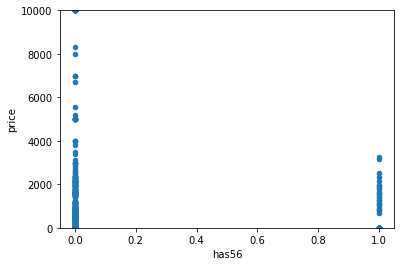

<Figure size 1080x360 with 0 Axes>

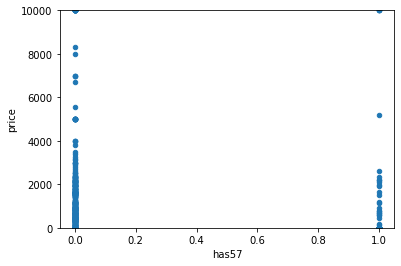

<Figure size 1080x360 with 0 Axes>

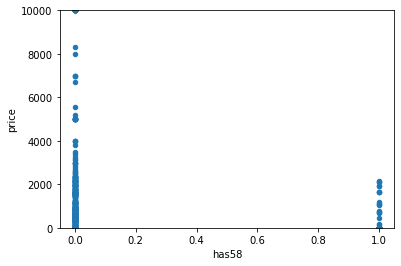

<Figure size 1080x360 with 0 Axes>

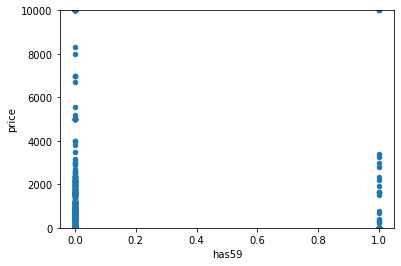

<Figure size 1080x360 with 0 Axes>

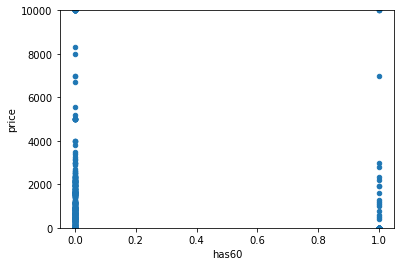

<Figure size 1080x360 with 0 Axes>

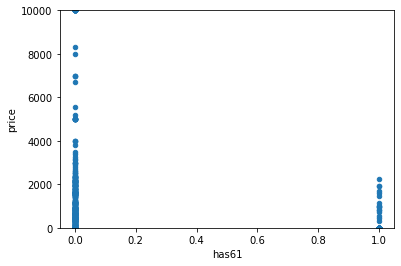

<Figure size 1080x360 with 0 Axes>

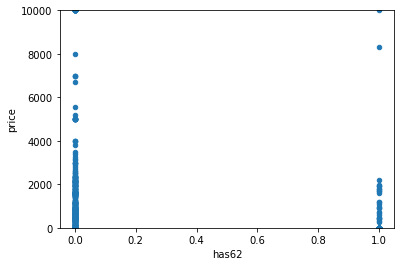

<Figure size 1080x360 with 0 Axes>

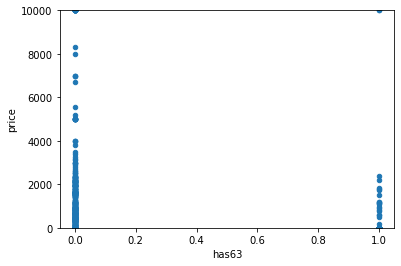

<Figure size 1080x360 with 0 Axes>

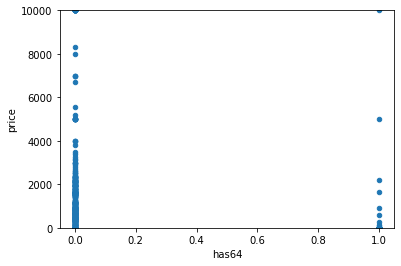

<Figure size 1080x360 with 0 Axes>

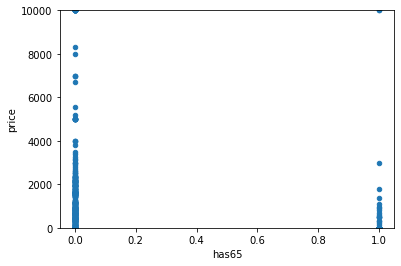

<Figure size 1080x360 with 0 Axes>

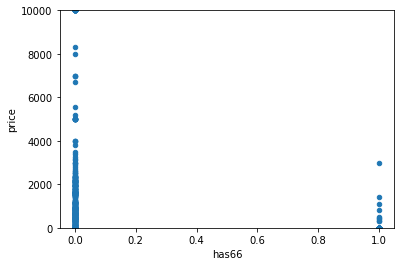

<Figure size 1080x360 with 0 Axes>

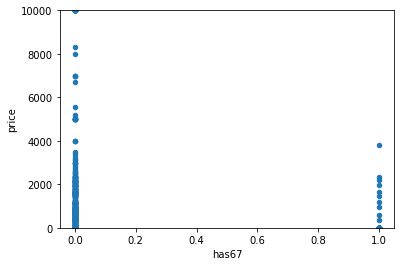

<Figure size 1080x360 with 0 Axes>

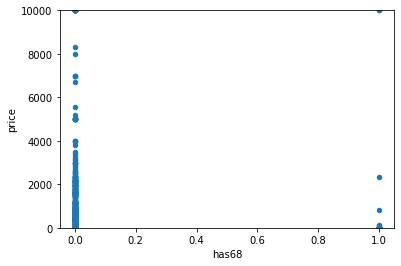

<Figure size 1080x360 with 0 Axes>

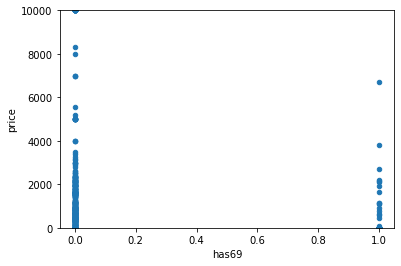

<Figure size 1080x360 with 0 Axes>

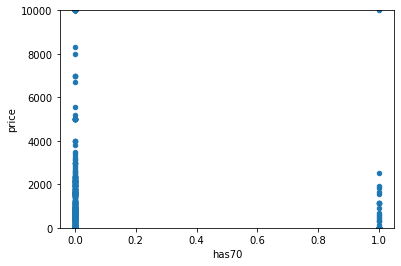

<Figure size 1080x360 with 0 Axes>

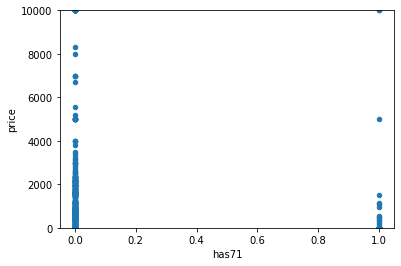

<Figure size 1080x360 with 0 Axes>

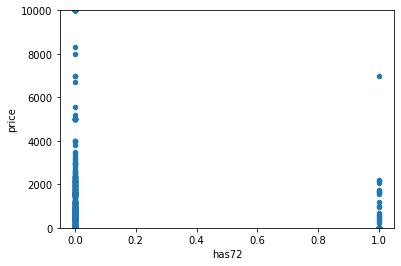

<Figure size 1080x360 with 0 Axes>

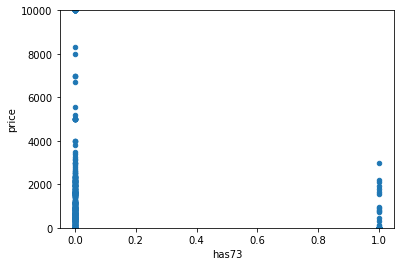

<Figure size 1080x360 with 0 Axes>

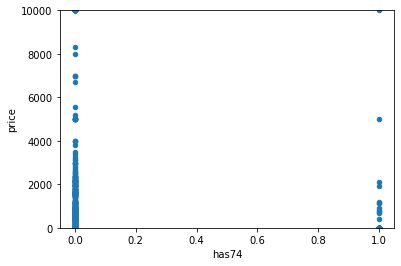

<Figure size 1080x360 with 0 Axes>

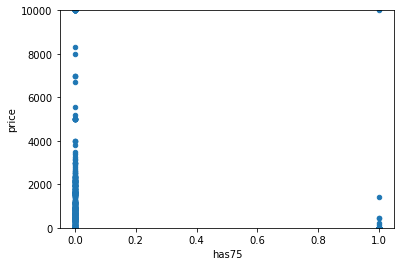

<Figure size 1080x360 with 0 Axes>

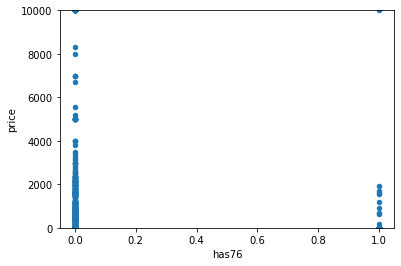

<Figure size 1080x360 with 0 Axes>

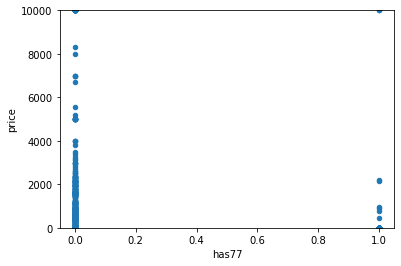

<Figure size 1080x360 with 0 Axes>

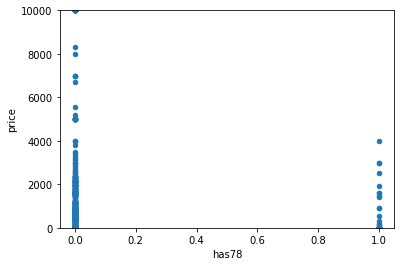

<Figure size 1080x360 with 0 Axes>

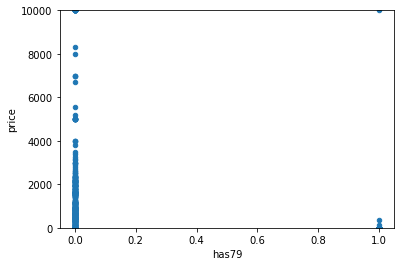

<Figure size 1080x360 with 0 Axes>

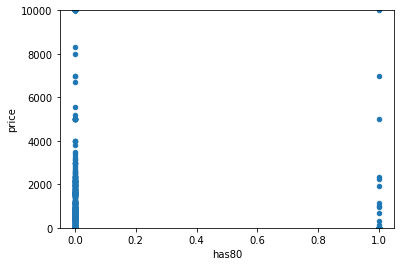

<Figure size 1080x360 with 0 Axes>

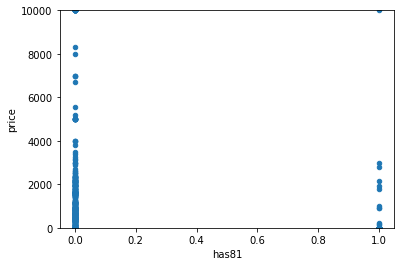

<Figure size 1080x360 with 0 Axes>

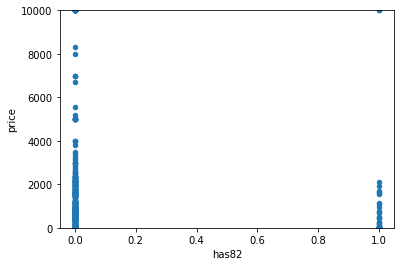

<Figure size 1080x360 with 0 Axes>

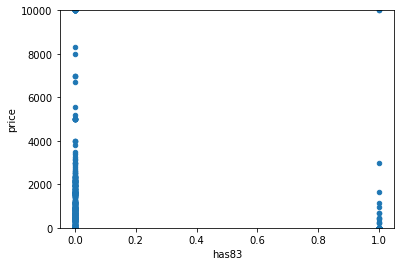

<Figure size 1080x360 with 0 Axes>

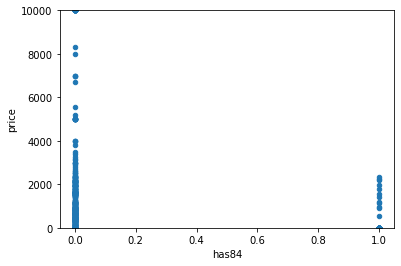

<Figure size 1080x360 with 0 Axes>

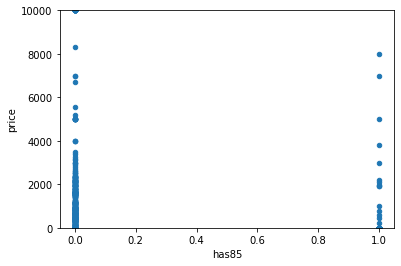

<Figure size 1080x360 with 0 Axes>

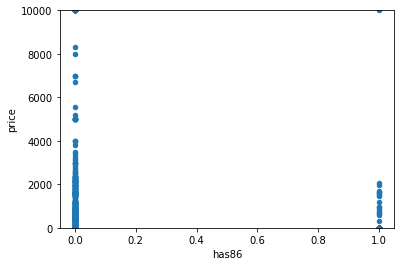

<Figure size 1080x360 with 0 Axes>

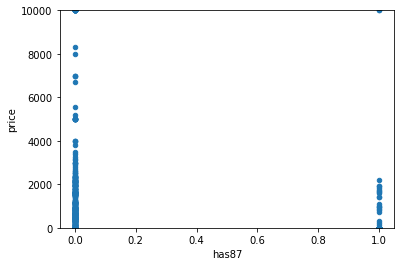

<Figure size 1080x360 with 0 Axes>

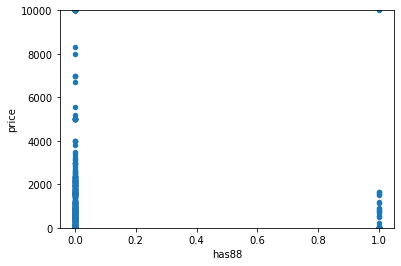

<Figure size 1080x360 with 0 Axes>

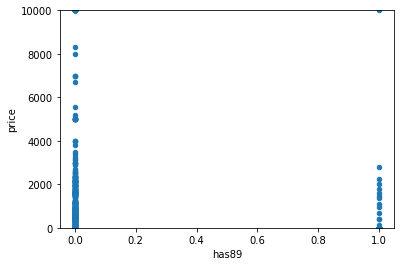

<Figure size 1080x360 with 0 Axes>

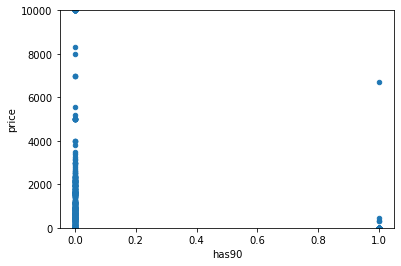

<Figure size 1080x360 with 0 Axes>

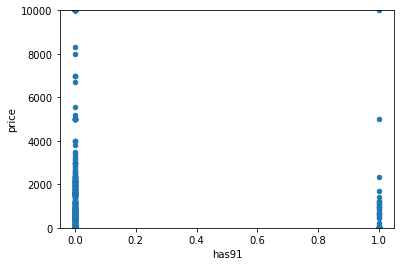

<Figure size 1080x360 with 0 Axes>

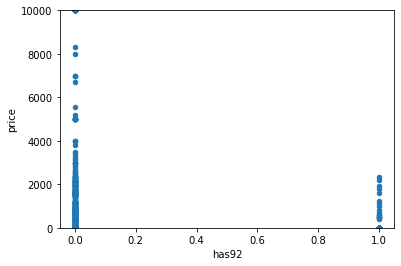

<Figure size 1080x360 with 0 Axes>

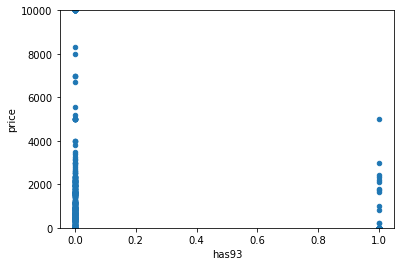

<Figure size 1080x360 with 0 Axes>

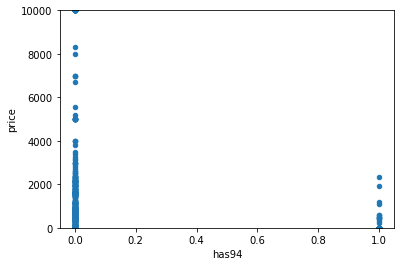

<Figure size 1080x360 with 0 Axes>

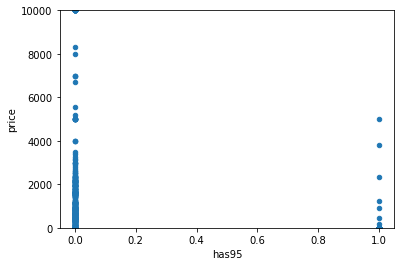

<Figure size 1080x360 with 0 Axes>

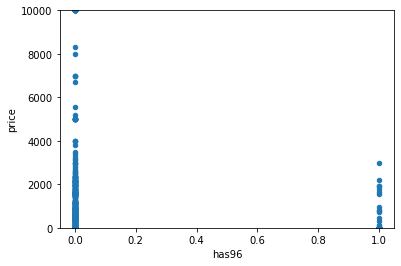

<Figure size 1080x360 with 0 Axes>

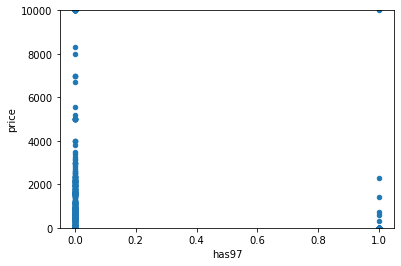

<Figure size 1080x360 with 0 Axes>

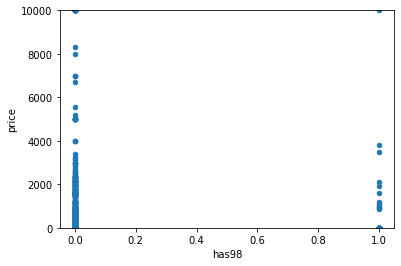

<Figure size 1080x360 with 0 Axes>

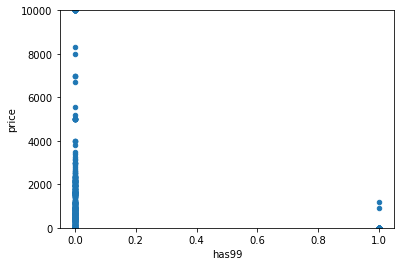

<Figure size 1080x360 with 0 Axes>

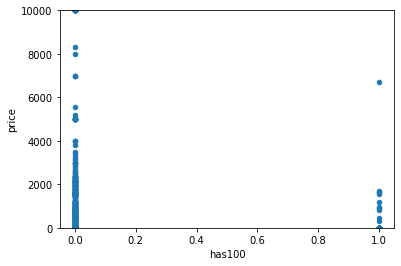

<Figure size 1080x360 with 0 Axes>

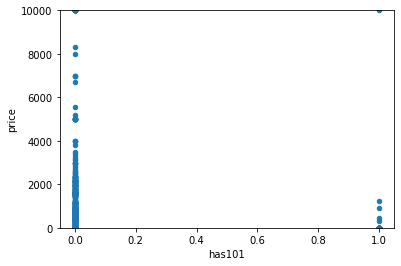

<Figure size 1080x360 with 0 Axes>

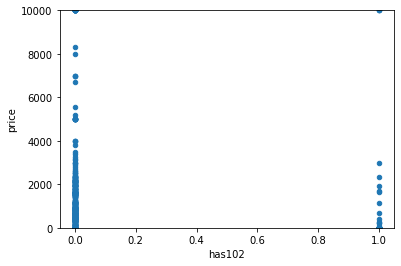

<Figure size 1080x360 with 0 Axes>

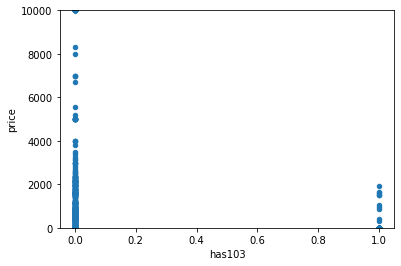

<Figure size 1080x360 with 0 Axes>

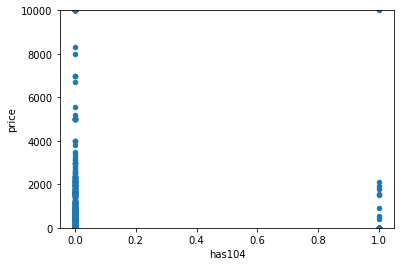

<Figure size 1080x360 with 0 Axes>

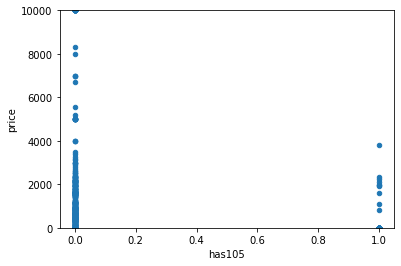

<Figure size 1080x360 with 0 Axes>

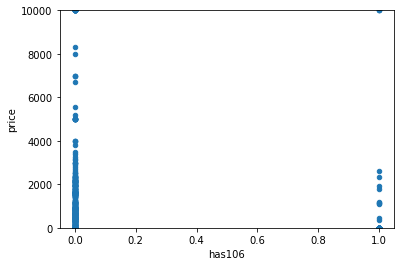

<Figure size 1080x360 with 0 Axes>

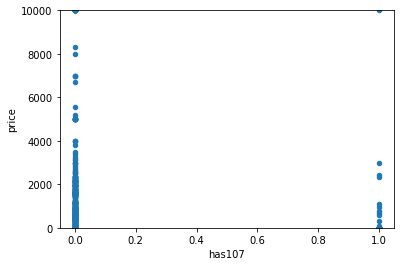

<Figure size 1080x360 with 0 Axes>

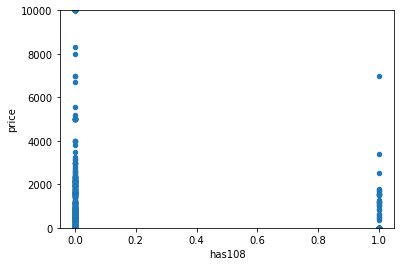

<Figure size 1080x360 with 0 Axes>

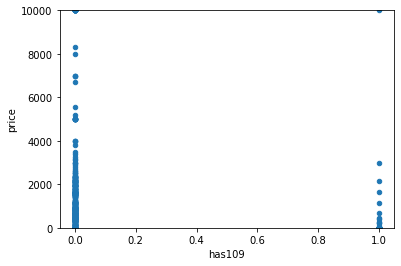

<Figure size 1080x360 with 0 Axes>

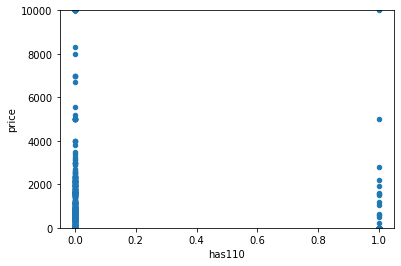

<Figure size 1080x360 with 0 Axes>

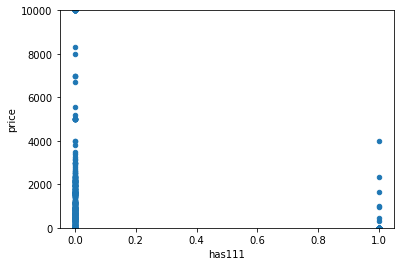

<Figure size 1080x360 with 0 Axes>

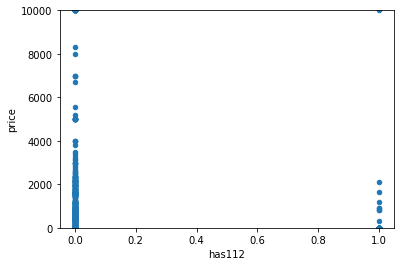

<Figure size 1080x360 with 0 Axes>

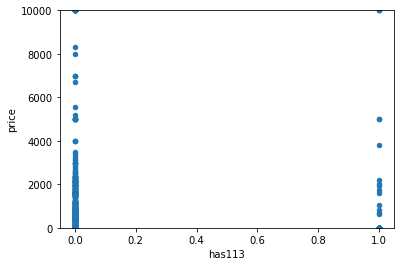

<Figure size 1080x360 with 0 Axes>

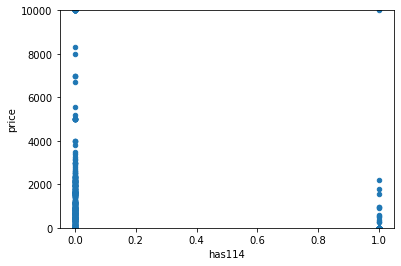

<Figure size 1080x360 with 0 Axes>

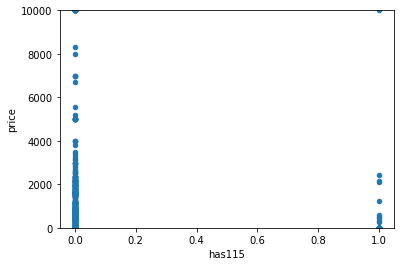

<Figure size 1080x360 with 0 Axes>

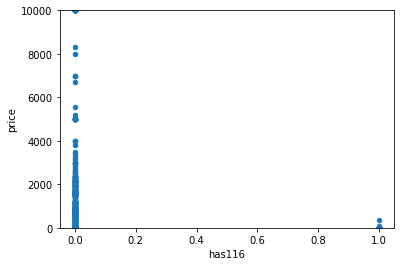

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

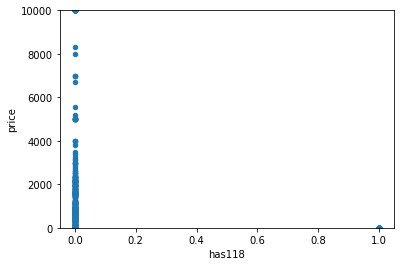

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

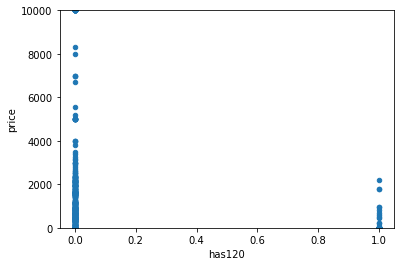

<Figure size 1080x360 with 0 Axes>

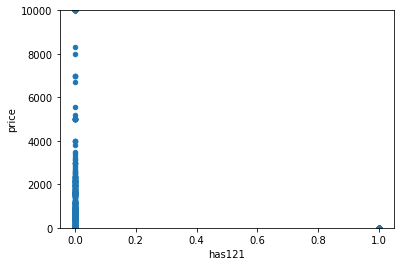

<Figure size 1080x360 with 0 Axes>

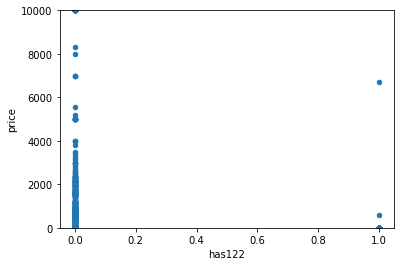

<Figure size 1080x360 with 0 Axes>

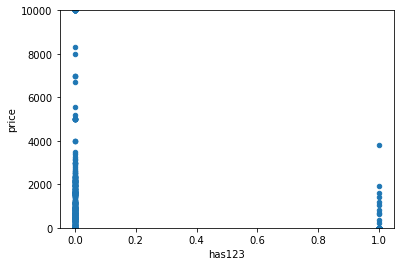

<Figure size 1080x360 with 0 Axes>

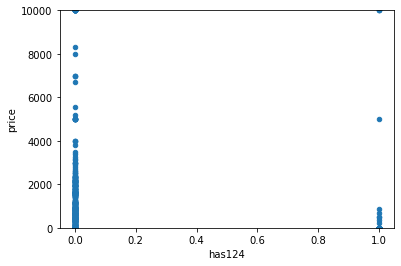

<Figure size 1080x360 with 0 Axes>

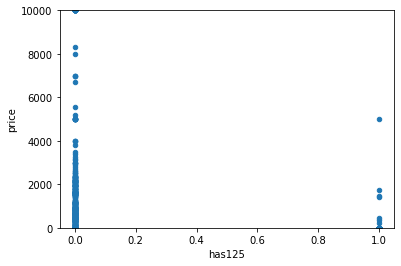

<Figure size 1080x360 with 0 Axes>

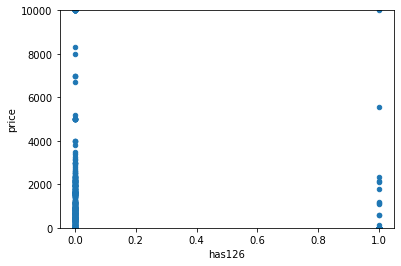

<Figure size 1080x360 with 0 Axes>

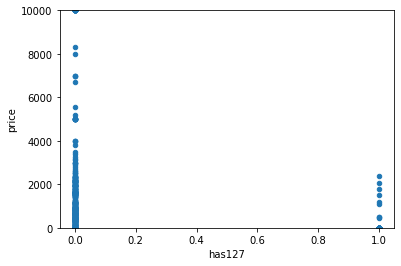

<Figure size 1080x360 with 0 Axes>

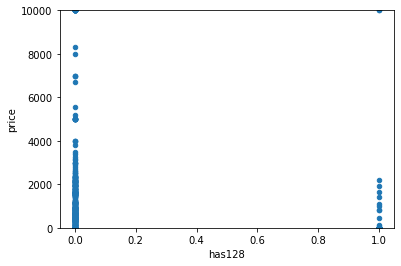

<Figure size 1080x360 with 0 Axes>

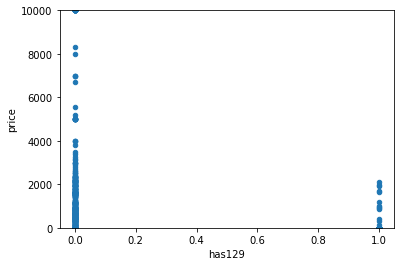

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

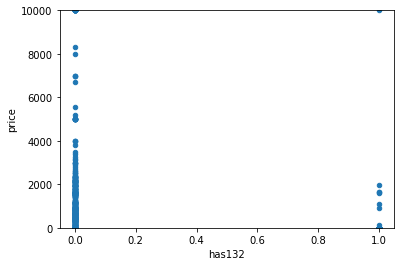

<Figure size 1080x360 with 0 Axes>

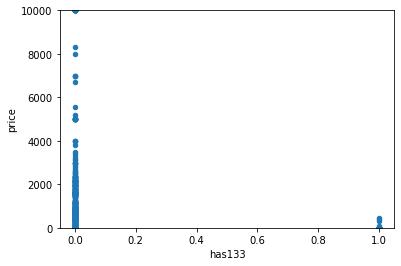

<Figure size 1080x360 with 0 Axes>

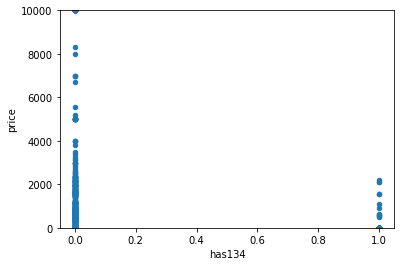

<Figure size 1080x360 with 0 Axes>

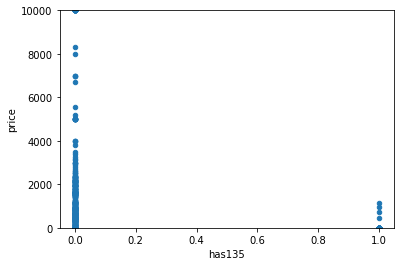

<Figure size 1080x360 with 0 Axes>

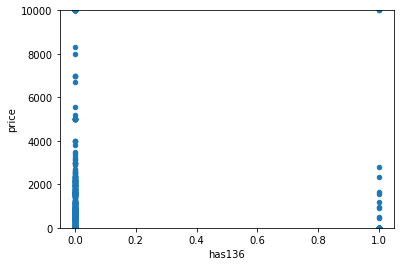

<Figure size 1080x360 with 0 Axes>

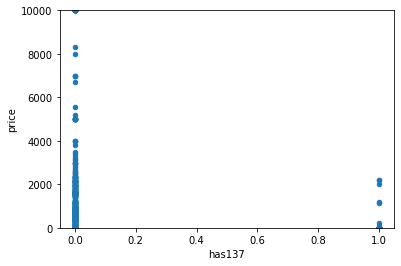

<Figure size 1080x360 with 0 Axes>

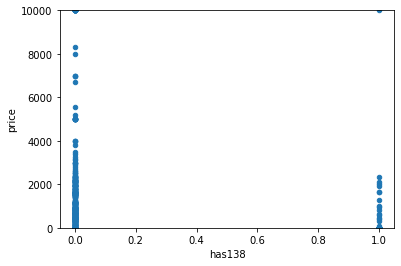

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

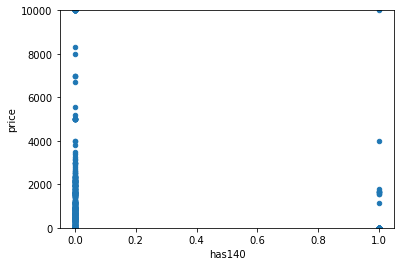

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

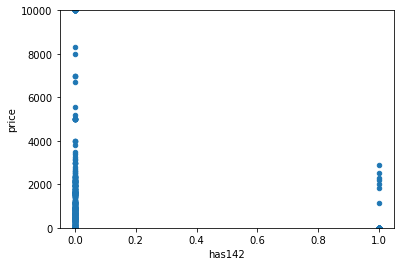

<Figure size 1080x360 with 0 Axes>

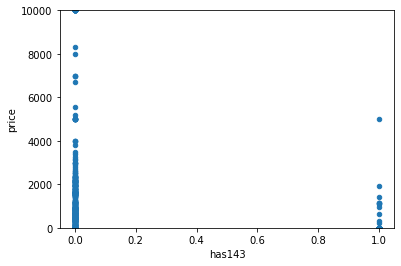

<Figure size 1080x360 with 0 Axes>

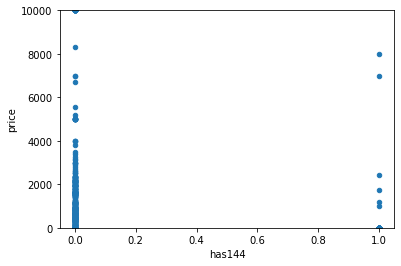

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

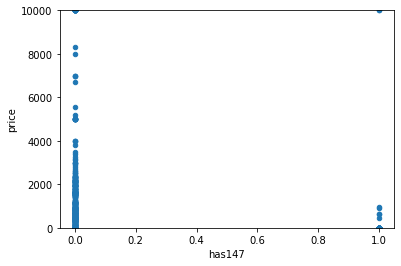

<Figure size 1080x360 with 0 Axes>

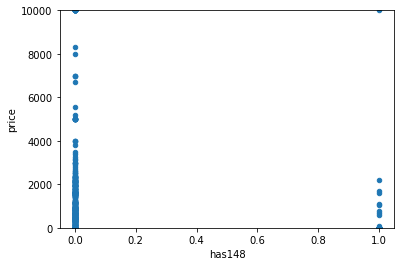

<Figure size 1080x360 with 0 Axes>

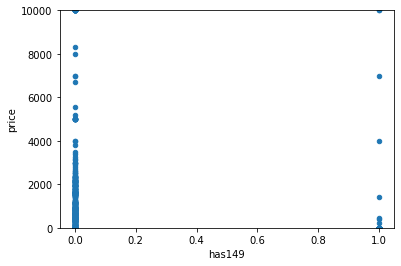

In [69]:
d = PreProcessor().getWordsAsFeatures(dataFrame)
def wordPlots(newDf, col):
    plt.figure(figsize=(15, 5))
    tempData = pd.concat([newDf['price'], newDf[col]], axis=1)
    tempData.plot.scatter(x=col,ylim=(0, 10000), y='price')

for r in d.columns[9:]:
    wordPlots(d, r)

<div style="direction:rtl">
کلاس زیر کارهای اولیه برای آموزش مدل مانند جداسازی داده های تست و آموزش را پیاده سازی میکند.
</div>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
TARGET_COL = "newPrice"

class Classifier():
    def __init__(self, dataSet):
        self.dataSet = dataSet.copy()

    def split(self):
        self.train, self.test = train_test_split(self.dataSet, random_state=41)
        self.trainX = self.train.drop(columns =[TARGET_COL])
        self.trainY = self.train[TARGET_COL]

        self.testX = self.test.drop(columns =[TARGET_COL])
        self.testY = self.test[TARGET_COL]

<div style="direction:rtl">
کلاس زیر برای آموزش مدل linearRegression استفاده شده است. در بخش اول آن داده ها را با استفاده از روش های بحث شده تمیز و آماده میکنیم و سپس به جدا میکنیم و به مدل میدهیم. در پایان خطا محاسبه شده است.
</div>

<div style="direction:rtl">
روش rmse برای محاسبه خطا در ادامه آمده عکس از:
www.includehelp.com
</div>

<div>
<img src="rmse-1.webp" alt="rmse">
</div>

<div style="direction:rtl">
روش mae برای محاسبه خطا در ادامه آمده عکس از:
www.multicom.hr
</div>

<div>
<img src="mae.jpg" alt="mae">
</div>

In [70]:
from sklearn.linear_model import LinearRegression

class LrClassifier(Classifier):
    def cleanData(self, isDesc = True):
        p = PreProcessor()
        self.dataSet = p.extractDateFeatures(self.dataSet)
        self.dataSet = p.refinePrice(self.dataSet)
        self.dataSet = p.getWordsAsFeatures(self.dataSet, 'title')
        if isDesc:
            self.dataSet = p.getWordsAsFeatures(self.dataSet, 'desc')
        self.dataSet = p.oneHotEncodeColumn(self.dataSet, ['brand', 'created_at', 'weekday', 'isWeekend', 'hour'])
        self.dataSet = self.dataSet.drop(columns=['Unnamed: 0', 'title', 'desc', 'brand', 'city', 'created_at', 'weekday', 'isWeekend', 'hour', 'price', PROCESSED_DESC])

    def trainModel(self):
        lr = LinearRegression()
        lr.fit(self.trainX, self.trainY)
        predictions = lr.predict(self.testX) 
        print('Root mean squard err:', np.sqrt(metrics.mean_squared_error(self.testY, predictions)))
        print('Mean absolute err:', metrics.mean_absolute_error(self.testY, predictions))  
        
    def tuneParameters(self):
        self.trainModel()


<div style="direction:rtl">
همانطور که دیده میشود نبودن کلمات مربوط به ستون توضیحات باعث بهبود نتایج میشود. ممکن است دلیل آن وجود کلمات بی ربط زیاد در متن توضیحات باشد. مهمترین نکات در تیتر معمولا گفته میشود. برای بخش بعدی توضیحات را نادیده میگیریم.
</div>

In [71]:
lr = LrClassifier(dfModel)
lrd = lr.cleanData()
lr.split()
lr.tuneParameters()

Root mean squard err: 413733.12840746104
Mean absolute err: 311656.31466004066


In [73]:
lr = LrClassifier(dfModel)
lrd = lr.cleanData(False)
lr.split()
lr.tuneParameters()

Root mean squard err: 364117.2436928114
Mean absolute err: 256437.8649951058


<div style="direction:rtl">
در این بخش از یک مدل دیگر یعنی LGBMRegressor استفاده شده است. این مدل باعث بهبود نتایج شده. این روش مبتنی بر درخت است که دقت را بهبود میبخشد.
</div>

In [60]:
import lightgbm as lgb

class LgbClassifier(Classifier):
    def cleanData(self):
        p = PreProcessor()
        self.dataSet = p.extractDateFeatures(self.dataSet)
        self.dataSet = p.refinePrice(self.dataSet)
        self.dataSet = p.getWordsAsFeatures(self.dataSet, 'title')
#         self.dataSet = p.getWordsAsFeatures(self.dataSet, 'desc')
        self.dataSet = p.oneHotEncodeColumn(self.dataSet, ['brand', 'created_at', 'weekday', 'isWeekend', 'hour'])
        self.dataSet = self.dataSet.drop(columns=['Unnamed: 0', 'title', 'desc', 'brand', 'city', 'created_at', 'weekday', 'isWeekend', 'hour', 'price', PROCESSED_DESC])

    def trainModel(self):
        lr = lgb.LGBMRegressor(subsample=0.9)
        lr.fit(self.trainX, self.trainY)
        predictions = lr.predict(self.testX) 
        print('Root mean squard err:', np.sqrt(metrics.mean_squared_error(self.testY, predictions)))
        print('Mean absolute err:', metrics.mean_absolute_error(self.testY, predictions))  
    
    def tuneParameters(self):
        self.trainModel()


In [61]:
lr = LgbClassifier(dfModel)
lrd = lr.cleanData()
lr.split()
m = lr.tuneParameters()

Root mean squard err: 342841.79200329725
Mean absolute err: 232393.12187597706


بهتر کردن هایپرپارامترها:

In [97]:
import lightgbm as lgb

class LgbClassifierT(Classifier):
    def cleanData(self):
        p = PreProcessor()
        self.dataSet = p.extractDateFeatures(self.dataSet)
        self.dataSet = p.refinePrice(self.dataSet)
        self.dataSet = p.getWordsAsFeatures(self.dataSet, 'title')
        #self.dataSet = p.getWordsAsFeatures(self.dataSet, 'desc')
        self.dataSet = p.oneHotEncodeColumn(self.dataSet, ['brand', 'created_at', 'weekday', 'isWeekend', 'hour'])
        self.dataSet = self.dataSet.drop(columns=['Unnamed: 0', 'title', 'desc', 'brand', 'city', 'created_at', 'weekday', 'isWeekend', 'hour', 'price', PROCESSED_DESC])

    def trainModel(self, nl, nEs, maxD, lrRate):
        lr = lgb.LGBMRegressor(subsample=0.9, num_leaves=nl, max_depth=maxD, n_estimators=nEs, learning_rate=lrRate)
        lr.fit(self.trainX, self.trainY)
        predictions = lr.predict(self.testX) 
        print('Root mean squard err:', np.sqrt(metrics.mean_squared_error(self.testY, predictions)))
        print('Mean absolute err:', metrics.mean_absolute_error(self.testY, predictions))  
    
    def tuneParameters(self):
        numLeaves = 31
        nEs = 100
        maxD = -1
        lrRate = 0.1
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        
        print("****")
        numLeaves = 31
        nEs = 100
        maxD = -1
        lrRate = 0.01
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        
        print("****")
        numLeaves = 31
        nEs = 100
        maxD = -1
        lrRate = 0.001
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)

        print("****")
        numLeaves = 31
        nEs = 250
        maxD = -1
        lrRate = 0.1
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        
        print("****")
        numLeaves = 31
        nEs = 500
        maxD = -1
        lrRate = 0.1
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        
        print("****")
        numLeaves = 31
        nEs = 50
        maxD = -1
        lrRate = 0.1
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        
        
        print("****")
        numLeaves = 31
        nEs = 250
        maxD = 1
        lrRate = 0.1
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        
        print("****")
        numLeaves = 31
        nEs = 250
        maxD = 2
        lrRate = 0.1
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        
        print("****")
        numLeaves = 31
        nEs = 250
        maxD = 3
        lrRate = 0.1
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        
        print("****")
        numLeaves = 31
        nEs = 250
        maxD = 4
        lrRate = 0.1
        print("num_leaves={}, max_depth={}, n_estimators={}, learning_rate={}".format(numLeaves,maxD,nEs,lrRate))
        self.trainModel(numLeaves, nEs, maxD, lrRate)
        

In [98]:
lr = LgbClassifierT(dfModel)
lrd = lr.cleanData()
lr.split()
lr.tuneParameters()

num_leaves=31, max_depth=-1, n_estimators=100, learning_rate=0.1
Root mean squard err: 342841.79200329725
Mean absolute err: 232393.12187597706
****
num_leaves=31, max_depth=-1, n_estimators=100, learning_rate=0.01
Root mean squard err: 396477.0464308672
Mean absolute err: 303132.5068038073
****
num_leaves=31, max_depth=-1, n_estimators=100, learning_rate=0.001
Root mean squard err: 522205.9118919913
Mean absolute err: 414835.50301552535
****
num_leaves=31, max_depth=-1, n_estimators=250, learning_rate=0.1
Root mean squard err: 342422.374914434
Mean absolute err: 231577.16856455783
****
num_leaves=31, max_depth=-1, n_estimators=500, learning_rate=0.1
Root mean squard err: 343565.3639788059
Mean absolute err: 233061.70971752962
****
num_leaves=31, max_depth=-1, n_estimators=50, learning_rate=0.1
Root mean squard err: 346004.70526013867
Mean absolute err: 236753.8964216708
****
num_leaves=31, max_depth=1, n_estimators=250, learning_rate=0.1
Root mean squard err: 378925.9123383452
Mean ab

****
num_leaves=31, max_depth=-1, n_estimators=250, learning_rate=0.1
Root mean squard err: 342422.374914434
Mean absolute err: 231577.16856455783

<div style="direction:rtl">
ایده ها:
<br>
۱. استفاده از شاخص tf idf این شاخص همانطور که گفته شد میتواند بهتر ویژگی های متن را نشان دهد. این روش موقع تست به مشکلاتی از جمله پر شدن حافظه رم و در مقیاس های کوچکتر که رم پر نمیشد داده های nan می داد. بخاطر کمبود وقت از این روش صرف نظر شد.
</br>
<br>
۲. بررسی بهتر کلمات از جمله ریشه یابی آنها. از آنجا که کلمات فارسی و محاوره ای هستند بررسی آنها زمان بر است اما می تواند به بهبود نتایج کمک کند.
</br>
<br>
۳. حذف کلماتی که تاثیر چندانی از نظر دریافت اطلاعات ندارند بجای استفاده از همه کلمات.
</br>
<br>
۴. بررسی بهتر تاریخ ایجاد. مثلا بازه ای از شبانه روز که ایجاد اتفاق افتاده می تواند تاثیر گذار باشد.
</br>
<br>
۵. حذف فیچرهای کم اثر و استفاده از ترکیب های مختلف فیچرها
</br>
<br>
۶. بهبود بخشیدن قیمت داده های پرت با توجه به سایر ویژگی ها از جمله برند و تیتر
</br>
<br>
۷.بهبود بخشیدن هایپرپارامترهای مدل
</br>
<br>
۸.استفاده از مدل های دیگر
</br>
</div>

منابع:

https://lightgbm.readthedocs.io/en/latest/

https://scikit-learn.org/stable/modules/linear_model.html

https://towardsdatascience.com/mercari-price-suggestion-97ff15840dbd

https://www.sobhe.ir/hazm/docs/hazm.html

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html